# Simple RL

In [ ]:
pip install progressbar

In [ ]:
!pip install ipynb

In [1]:
from ipynb.fs.full.FooEnv import *

In [2]:
import numpy as np
import random
import time
from IPython.display import clear_output
import progressbar
#from FooEnv import FooEnv
from numpy import savetxt
from numpy import loadtxt

In [4]:
start = np.array([0,1,1,0.0,0.0]) 
env = FooEnv(start)
state_space_size = 20
action_space_size = 15
q_table = np.zeros((state_space_size,action_space_size))
num_episodes = 100
max_steps_per_episode = 1000 
learning_rate = 0.001#
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = (max_exploration_rate - min_exploration_rate)/num_episodes #0.1
rewards_all_episodes = [] 
cost_all_1= []
state_all=[]
major_count_all_1=[]
no_count_all_1=[]
Count_step=np.array([])
CUMULATIVE_ERROR_vector_RL=[]
for episode in range(num_episodes): 
    state = env.reset()
    state = env.observe()
    #exploration_rate = exploration_rate - (exploration_decay_rate*max_exploration_rate)
    if exploration_rate < min_exploration_rate:
        exploration_rate = min_exploration_rate
    CUMULATIVE_ERROR = 0  
    rewards_current_episode = 0
    CUMULATIVE_ERROR_ = 0
    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            if np.shape(state) == (1,5):
                state=np.squeeze(state, axis=(0,))
                    #print('state', np.shape(state))
            action = np.argmax(q_table[int(state[0]),:])
        else:
            action = np.random.randint(0, action_space_size)

        new_state, X_user, Y_user, x_TDoA, y_TDoA, reward, error = env.update_probability_matrix(action)

        state = [new_state[0], X_user, Y_user, x_TDoA, y_TDoA]
        #print('state', state)
        #print('error', error)
        #print(q_table)
        #print('error', error)
        q_table[int(state[0]), action] = q_table[int(state[0]), action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[int(new_state[0]), :]))
        #state[0][0] = new_state[0]
        rewards_current_episode += reward
        CUMULATIVE_ERROR += error
        state_all = np.append(state_all, state)
    CUMULATIVE_ERROR_ = CUMULATIVE_ERROR/ max_steps_per_episode
    print("mean error {}".format(CUMULATIVE_ERROR_))
    print("Reward {}".format(rewards_current_episode))
    print("episode {} ".format(episode))
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    Count_step = np.append(Count_step, step)
    CUMULATIVE_ERROR_vector_RL=np.append(CUMULATIVE_ERROR_vector_RL, CUMULATIVE_ERROR_)


mean error 2.762299541300059
Reward -1572.9712905663616
episode 0 
mean error 2.7718826328117614
Reward -1583.4681203039531
episode 1 
mean error 2.782017841573205
Reward -1588.3424834514065
episode 2 
mean error 2.5484247748096323
Reward -1158.9228737073054
episode 3 
mean error 2.671066070269338
Reward -1381.6580683897741
episode 4 
mean error 2.6601467423110545
Reward -1359.8714799764937
episode 5 
mean error 2.542176458582934
Reward -1125.1544210171514
episode 6 
mean error 2.5462269507806803
Reward -1122.0655353850584
episode 7 
mean error 2.575651495385604
Reward -1189.0051148925172
episode 8 
mean error 2.563959169614025
Reward -1160.0878115202067
episode 9 
mean error 2.5553865401349563
Reward -1132.1525559407958
episode 10 
mean error 2.581356573451009
Reward -1189.6257043606154
episode 11 
mean error 2.509727729249091
Reward -1026.2941454797635
episode 12 
mean error 2.605221006810423
Reward -1201.3632480183178
episode 13 
mean error 2.435888189900252
Reward -875.544225807315

In [ ]:
# savetxt('Error_RL_epsilon9.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
# savetxt('Reward_RL_epsilon9.csv', rewards_all_episodes, delimiter=',')
# savetxt('q_table_RL_epsilon9.csv', q_table, delimiter=',')

savetxt('Error_RL_learning0001.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
savetxt('Reward_RL_learning0001.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_RL_learning0001.csv', q_table, delimiter=',')

# savetxt('Error_RL_learning001.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
# savetxt('Reward_RL_learning001.csv', rewards_all_episodes, delimiter=',')
# savetxt('q_table_RL_learning001.csv', q_table, delimiter=',')

# savetxt('Error_RL_learning01.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
# savetxt('Reward_RL_learning01.csv', rewards_all_episodes, delimiter=',')
# savetxt('q_table_RL_learning01.csv', q_table, delimiter=',')

# savetxt('Error_RL_learning1.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
# savetxt('Reward_RL_learning1.csv', rewards_all_episodes, delimiter=',')
# savetxt('q_table_RL_learning1.csv', q_table, delimiter=',')

# savetxt('Error_RL_learning1_Discount1.csv', CUMULATIVE_ERROR_vector_RL, delimiter=',')
# savetxt('Reward_RL_learning1_Discount1.csv', rewards_all_episodes, delimiter=',')
# savetxt('q_table_RL_learning1_Discount1.csv', q_table, delimiter=',')

In [ ]:

Error_RL_learning0001 = loadtxt('Error_RL_learning0001.csv', delimiter=',')
Reward_RL_learning0001 = loadtxt('Reward_RL_learning0001.csv', delimiter=',')
q_table_RL_learning0001 = loadtxt('q_table_RL_learning0001.csv', delimiter=',')

Error_RL_learning001 = loadtxt('Error_RL_learning001.csv', delimiter=',')
Reward_RL_learning001 = loadtxt('Reward_RL_learning001.csv', delimiter=',')
q_table_RL_learning001 = loadtxt('q_table_RL_learning001.csv', delimiter=',')

Error_RL_learning01 = loadtxt('Error_RL_learning01.csv', delimiter=',')
Reward_RL_learning01 = loadtxt('Reward_RL_learning01.csv', delimiter=',')
q_table_RL_learning01 = loadtxt('q_table_RL_learning01.csv', delimiter=',')

Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',')
Reward_RL_learning1 = loadtxt('Reward_RL_learning1.csv', delimiter=',')
q_table_RL_learning1 = loadtxt('q_table_RL_learning1.csv', delimiter=',')

In [ ]:
Error_RL_learning1_Discount1 = loadtxt('Error_RL_learning1_Discount1.csv', delimiter=',')
Reward_RL_learning1_Discount1 = loadtxt('Reward_RL_learning1_Discount1.csv', delimiter=',')
q_table_RL_learning1_Discount1 = loadtxt('q_table_RL_learning1_Discount1.csv', delimiter=',')

Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',')
Error_RL_learning01 = loadtxt('Error_RL_learning01.csv', delimiter=',')
Error_RL_learning001 = loadtxt('Error_RL_learning001.csv', delimiter=',')
Error_RL_learning0001 = loadtxt('Error_RL_learning0001.csv', delimiter=',')

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Average Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_RL_learning1, 'green', lw=2, label = r'$\alpha = 0.1$')
plt.plot(Error_RL_learning01, 'blue', lw=2, label =r'$\alpha = 0.01$')
plt.plot(Error_RL_learning001, 'cyan', lw=2, label = r'$\alpha = 0.001$')
plt.plot(Error_RL_learning0001, 'red', lw=2, label =r'$\alpha = 0.0001$')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
axes = plt.axes([.3, .5, .6, .15])
x = np.array(range(40,100))
axes.plot(x,Error_RL_learning1[40:100], c='green', lw=2)
axes.plot(x,Error_RL_learning01[40:100], c='blue', lw=2)
axes.plot(x,Error_RL_learning001[40:100], c='cyan', lw=2)
axes.plot(x,Error_RL_learning0001[40:100], c='red', lw=2)
plt.show()

In [ ]:
Reward_RL_learning1 = loadtxt('Reward_RL_learning1.csv', delimiter=',')
Reward_RL_learning01 = loadtxt('Reward_RL_learning01.csv', delimiter=',')
Reward_RL_learning001 = loadtxt('Reward_RL_learning001.csv', delimiter=',')
Reward_RL_learning0001 = loadtxt('Reward_RL_learning0001.csv', delimiter=',')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cumulative Reward Function", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Reward_RL_learning1, 'green', lw=2, label = r'$\alpha = 0.1$')
plt.plot(Reward_RL_learning01, 'blue', lw=2, label =r'$\alpha = 0.01$')
plt.plot(Reward_RL_learning001, 'cyan', lw=2, label = r'$\alpha = 0.001$')
plt.plot(Reward_RL_learning0001, 'red', lw=2, label =r'$\alpha = 0.0001$')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
axes = plt.axes([.3, .5, .6, .15])
x = np.array(range(40,100))
axes.plot(x,Reward_RL_learning1[40:100], c='green', lw=2)
axes.plot(x,Reward_RL_learning01[40:100], c='blue', lw=2)
axes.plot(x,Reward_RL_learning001[40:100], c='cyan', lw=2)
axes.plot(x,Reward_RL_learning0001[40:100], c='red', lw=2)
plt.show()

# Jump-Start Reinforcement Learning

In [5]:
q_table_policy = q_table

In [6]:
max_step = 0.9 * max_steps_per_episode
step_threshold = max_step
min_step = 0
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = (max_exploration_rate - min_exploration_rate)/num_episodes #0.1

#exploration_rate = 1
#exploration_decay_step = (max_step-min_step)/num_episodes
rewards_all_episodes_ = [] 
CUMULATIVE_ERROR_vector = []
q_table = np.zeros((state_space_size,action_space_size))

for episode in range(num_episodes): 
    state = env.reset()
    state = env.observe()
    #print('state', state)
    CUMULATIVE_ERROR = 0
    CUMULATIVE_ERROR_ = 0
    rewards_current_episode = 0
    #exploration_rate = exploration_rate - 0.02
    if exploration_rate < min_exploration_rate:
        exploration_rate = min_exploration_rate
    
    step_threshold = step_threshold-15 #(exploration_decay_step *max_step)
    if step_threshold < min_step:
        step_threshold = min_step
    print('exploration', exploration_rate)
    print('step_threshold', step_threshold)
    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = random.uniform(0,1)
        
        if step < step_threshold:
            if np.shape(state) == (1,5):
                state=np.squeeze(state, axis=(0,))
            action = np.argmax(q_table_policy[int(state[0]),:])
        else:  
            if exploration_rate_threshold > exploration_rate:
                if np.shape(state) == (1,5):
                    state=np.squeeze(state, axis=(0,))
                    #print('state', np.shape(state))
                action = np.argmax(q_table[int(state[0]),:])
            else:
                action = np.random.randint(0, action_space_size)
                #print('action', action)

            new_state, X_user, Y_user, x_TDoA, y_TDoA, reward, error = env.update_probability_matrix(action)

            state = [new_state[0], X_user, Y_user, x_TDoA, y_TDoA]
        q_table[int(state[0]), action] = q_table[int(state[0]), action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[int(new_state[0]), :]))
        rewards_current_episode += reward
        CUMULATIVE_ERROR += error
        state_all = np.append(state_all, state)
    
    CUMULATIVE_ERROR_ = CUMULATIVE_ERROR/ max_steps_per_episode
    print("mean error {}".format(CUMULATIVE_ERROR_))
    print("Reward {}".format(rewards_current_episode))
    print("episode {} ".format(episode))
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_.append(rewards_current_episode)
    Count_step = np.append(Count_step, step)
    CUMULATIVE_ERROR_vector=np.append(CUMULATIVE_ERROR_vector, CUMULATIVE_ERROR_)



exploration 0.38152083392182734
step_threshold 885.0
mean error 3.551369521637304
Reward -3316.8779702374422
episode 0 
exploration 1.0
step_threshold 870.0
mean error 4.131632314415097
Reward -3963.3513724048526
episode 1 
exploration 0.9902473552461276
step_threshold 855.0
mean error 0.6025470408416669
Reward 2996.1106135996065
episode 2 
exploration 0.9805907853202301
step_threshold 840.0
mean error 4.039075556345585
Reward -3850.0864032954096
episode 3 
exploration 0.9710293437741592
step_threshold 825.0
mean error 3.622431232476819
Reward -3405.233166223298
episode 4 
exploration 0.9615620934833748
step_threshold 810.0
mean error 0.7951917615367438
Reward 2288.0703949272897
episode 5 
exploration 0.9521881065550976
step_threshold 795.0
mean error 3.947582126727313
Reward -3680.4184905960024
episode 6 
exploration 0.9429064642373647
step_threshold 780.0
mean error 0.9554707827969136
Reward 1362.128456935696
episode 7 
exploration 0.9337162568289827
step_threshold 765.0
mean error 3

mean error 1.4787448514590482
Reward 1151.5580639425345
episode 69 
exploration 0.5099984223557109
step_threshold 0
mean error 1.4777906155385576
Reward 1143.470544688643
episode 70 
exploration 0.50507285973881
step_threshold 0
mean error 1.5912174334168485
Reward 921.7479413367255
episode 71 
exploration 0.5001958196091976
step_threshold 0
mean error 1.4776613753150405
Reward 1123.3247655771268
episode 72 
exploration 0.49536682396426646
step_threshold 0
mean error 1.5642396976712278
Reward 977.0253502620586
episode 73 
exploration 0.49058539951028785
step_threshold 0
mean error 1.4641869993703727
Reward 1185.0406950504496
episode 74 
exploration 0.4858510776160235
step_threshold 0
mean error 1.445050957487622
Reward 1199.597810270573
episode 75 
exploration 0.4811633942667948
step_threshold 0
mean error 1.4229555808429626
Reward 1255.5844962985523
episode 76 
exploration 0.4765218900190041
step_threshold 0
mean error 1.4157698337788913
Reward 1253.60507582371
episode 77 
exploration

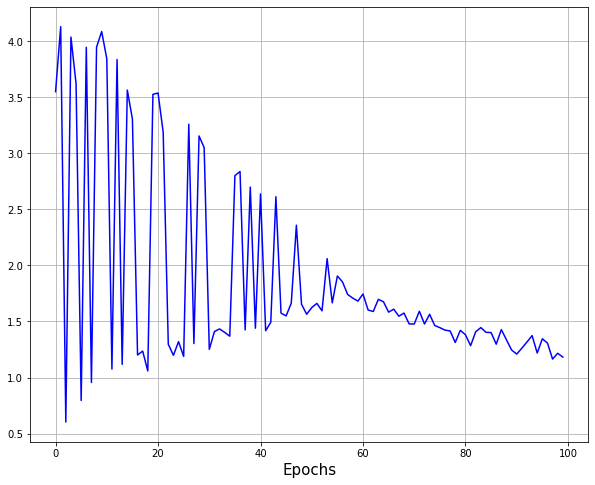

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlabel('Epochs', fontsize = 15) 
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue')

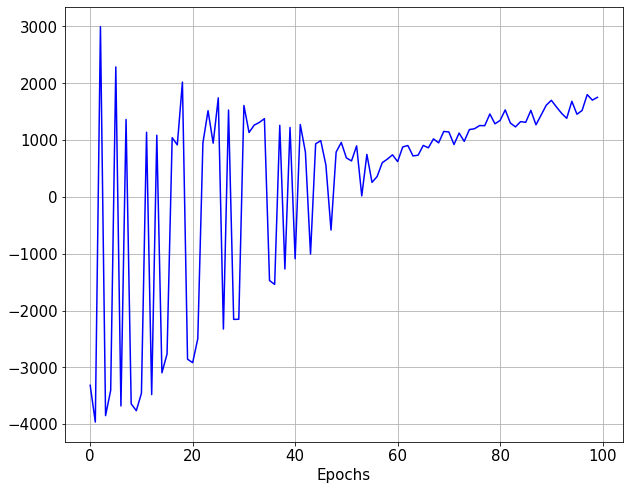

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlabel('Epochs', fontsize = 15) 
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue')

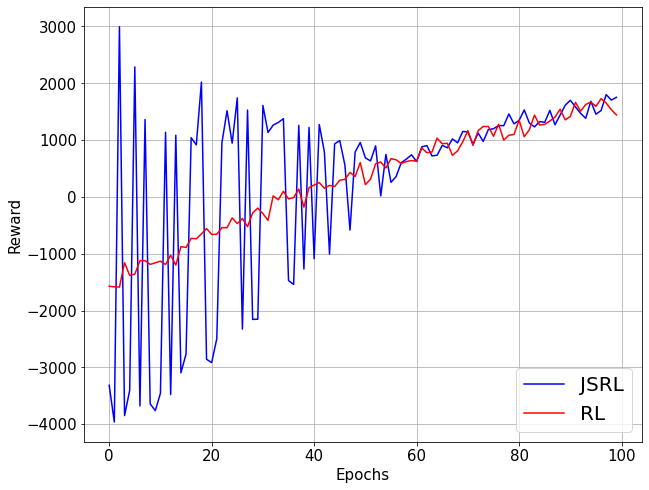

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Reward", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue', label = 'JSRL')
plt.plot(rewards_all_episodes, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium') 

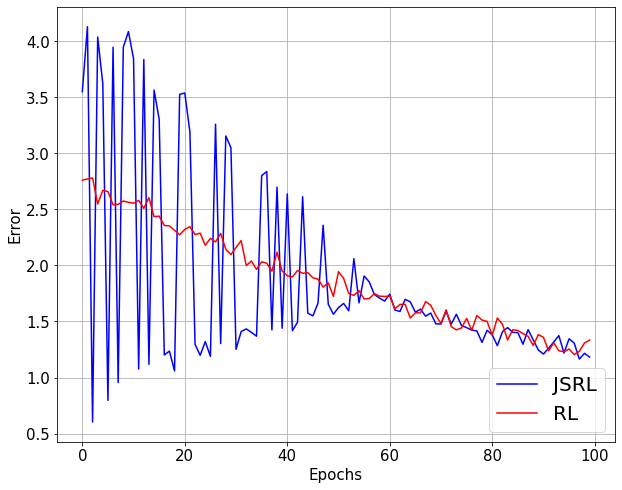

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue', label = 'JSRL')
plt.plot(CUMULATIVE_ERROR_vector_RL, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium') 